##### https://github.com/erocarrera/pydot/blob/master/pydot.py
##### https://pythonhaven.wordpress.com/tag/pydot/


In [4]:
import pydot
from cStringIO import StringIO

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Use Pydot to construct a Graph and Matplotlib to show

In [16]:
def plotpydot(pydot_graph):
    ''' Friendly function to plot pydot graphs'''
    png_str = pydot_graph.create_png(prog='dot')

    # treat the dot output string as an image file
    sio = StringIO()
    sio.write(png_str)
    sio.seek(0)
    img = mpimg.imread(sio)
    # persist if necessary 
    pydot_graph.write_png('example1_graph.png')
    # plot the image
    imgplot = plt.imshow(img, aspect='equal')
    plt.show(block=False)

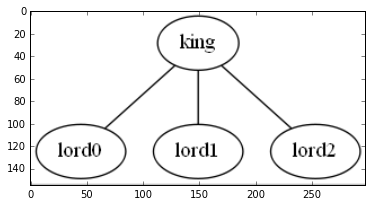

In [10]:
pydot_graph = pydot.Dot(graph_type='graph')
for i in range(3):
    
    edge = pydot.Edge("king", "lord%d" % i)
    # and we obviosuly need to add the edge to our graph
    pydot_graph.add_edge(edge)

plotpydot(pydot_graph)


### PyDot APIs

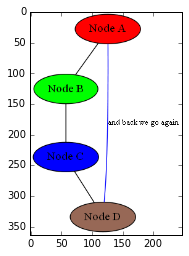

In [15]:
pydot_graph = pydot.Dot(graph_type='graph')
node_a = pydot.Node("Node A", style="filled", fillcolor="red")
node_b = pydot.Node("Node B", style="filled", fillcolor="green")
node_c = pydot.Node("Node C", style="filled", fillcolor="#0000ff")
node_d = pydot.Node("Node D", style="filled", fillcolor="#976856")
pydot_graph.add_node(node_a)
pydot_graph.add_node(node_b)
pydot_graph.add_node(node_c)
pydot_graph.add_node(node_d)
pydot_graph.add_edge(pydot.Edge(node_a, node_b))
pydot_graph.add_edge(pydot.Edge(node_b, node_c))
pydot_graph.add_edge(pydot.Edge(node_c, node_d))
# but, let's make this last edge special, yes?
pydot_graph.add_edge(pydot.Edge(node_d, node_a, label="and back we go again", 
                                labelfontcolor="#009933", 
                                fontsize="10.0", 
                                color="blue"))
# or set manually 
#edge = pydot.Edge(node_d, node_a)
#edge.set_label("and back we go again")
#edge.set_labelfontcolor("#009933")
#edge.set_fontsize("10.0")
#edge.set_color("blue")


plotpydot(pydot_graph)

### Bespoke class to create graphs

In [51]:
graph = { "a" : ["c"],
          "b" : ["c", "e"],
          "c" : ["a", "b", "d", "e"],
          "d" : ["c"],
          "e" : ["c", "b"],
          "f" : []
        }

def generate_edges(graph):
    edges = []
    for node in graph:
        for neighbour in graph[node]:
            edges.append((node, neighbour))

    return edges

print(generate_edges(graph))

[('a', 'c'), ('c', 'a'), ('c', 'b'), ('c', 'd'), ('c', 'e'), ('b', 'c'), ('b', 'e'), ('e', 'c'), ('e', 'b'), ('d', 'c')]


In [66]:
""" A Python Class
A simple Python graph class, demonstrating the essential 
facts and functionalities of graphs.
"""


class Graph(object):

    def __init__(self, graph_dict=None):
        """ initializes a graph object 
            If no dictionary or None is given, 
            an empty dictionary will be used
        """
        if graph_dict == None:
            graph_dict = {}
        self.__graph_dict = graph_dict

    def vertices(self):
        """ returns the vertices of a graph """
        return list(self.__graph_dict.keys())

    def edges(self, return_type=''):
        """ returns the edges of a graph """
        return self.__generate_edges(return_type)

    def add_vertex(self, vertex):
        """ If the vertex "vertex" is not in 
            self.__graph_dict, a key "vertex" with an empty
            list as a value is added to the dictionary. 
            Otherwise nothing has to be done. 
        """
        if vertex not in self.__graph_dict:
            self.__graph_dict[vertex] = []

    def add_edge(self, edge):
        """ assumes that edge is of type set, tuple or list; 
            between two vertices can be multiple edges! 
        """
        edge = set(edge)
        (vertex1, vertex2) = tuple(edge)
        if vertex1 in self.__graph_dict:
            self.__graph_dict[vertex1].append(vertex2)
        else:
            self.__graph_dict[vertex1] = [vertex2]

    def __generate_edges(self, return_type=''):
        """ A static method generating the edges of the graph "graph". Edges are represented as sets 
            with one (a loop back to the vertex) or two vertices 
        """
        edges = []
        pydotedges  = []
        
        for vertex in self.__graph_dict:
            for neighbour in self.__graph_dict[vertex]:
                if {neighbour, vertex} not in edges:
                    edges.append({vertex, neighbour})
                    
                    if return_type =='pydot':
                        edgeObj = pydot.Edge(vertex, neighbour)
                        pydotedges.append(edgeObj)
        
        print return_type
        
        if return_type == 'pydot' :
            return pydotedges
        else:
            return edges
    
    def toPyDotGraph(self):
        pdgraph = pydot.Dot(graph_type='graph')
        
        for nodenm in self.vertices():
            node = pydot.Node(nodenm)
            pdgraph.add_node(node)
        
        print self.edges()
        # self.edges returns a list of sets
        for edgeObj in self.edges(return_type='pydot'):
            pdgraph.add_edge(edgeObj)
        
        return pdgraph

    def __str__(self):
        res = "vertices: "
        for k in self.__graph_dict:
            res += str(k) + " "
        res += "\nedges: "
        for edge in self.__generate_edges():
            res += str(edge) + " "
        return res




Vertices of graph:
['a', 'c', 'b', 'e', 'd', 'f']
Edges of graph:

[set(['a', 'd']), set(['c', 'b']), set(['c']), set(['c', 'd']), set(['c', 'e'])]
Add vertex:
Vertices of graph:
['a', 'c', 'b', 'e', 'd', 'f', 'z']
Add an edge:
Vertices of graph:
['a', 'c', 'b', 'e', 'd', 'f', 'z']
Edges of graph:

[set(['a', 'd']), set(['a', 'z']), set(['c', 'b']), set(['c']), set(['c', 'd']), set(['c', 'e'])]
Adding an edge {"x","y"} with new vertices:
Vertices of graph:
['a', 'c', 'b', 'e', 'd', 'f', 'y', 'z']
Edges of graph:

[set(['a', 'd']), set(['a', 'z']), set(['c', 'b']), set(['c']), set(['c', 'd']), set(['c', 'e']), set(['y', 'x'])]

[set(['a', 'd']), set(['a', 'z']), set(['c', 'b']), set(['c']), set(['c', 'd']), set(['c', 'e']), set(['y', 'x'])]
pydot


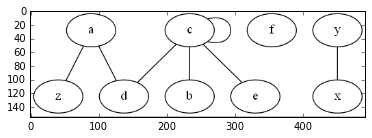

In [67]:
g = { "a" : ["d"],
      "b" : ["c"],
      "c" : ["b", "c", "d", "e"],
      "d" : ["a", "c"],
      "e" : ["c"],
      "f" : []
    }


graph = Graph(g)

print("Vertices of graph:")
print(graph.vertices())

print("Edges of graph:")
print(graph.edges())

print("Add vertex:")
graph.add_vertex("z")

print("Vertices of graph:")
print(graph.vertices())

print("Add an edge:")
graph.add_edge({"a","z"})

print("Vertices of graph:")
print(graph.vertices())

print("Edges of graph:")
print(graph.edges())

print('Adding an edge {"x","y"} with new vertices:')
graph.add_edge({"x","y"})
print("Vertices of graph:")
print(graph.vertices())
print("Edges of graph:")
print(graph.edges())

plotpydot(graph.toPyDotGraph())